In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_train = pd.read_csv('weather_train.csv')
print(len(df_train))
df_test = pd.read_csv('weather_test.csv')
df_test.drop(columns = ['Unnamed: 0'], inplace = True)
df_train = pd.concat([df_train, df_test], axis = 0)

158131


In [ ]:
df_train.dropna(inplace = True)

In [ ]:
df_train[df_train['snow_3h']!=0]

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
2600,2015-03-23 11:00:00+01:00,Bilbao,276.356000,276.356000,276.356000,1012,98,0,147,0.9,0.0,2.746,92,501,rain,moderate rain,10
2926,2015-01-20 04:00:00+01:00,Bilbao,275.203000,275.203000,275.203000,1012,97,1,198,0.3,0.0,0.200,88,500,rain,light rain,10
6250,2015-02-04 20:00:00+01:00,Bilbao,274.826656,274.826656,274.826656,1014,90,3,13,0.3,0.0,20.900,89,500,rain,light rain,10
10148,2015-02-08 16:00:00+01:00,Bilbao,277.219500,277.219500,277.219500,1031,82,2,21,0.3,0.0,0.200,78,500,rain,light rain,10
11016,2015-02-01 09:00:00+01:00,Bilbao,276.367344,276.367344,276.367344,1010,92,4,314,0.9,0.0,0.550,92,501,rain,moderate rain,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152628,2015-02-03 10:00:00+01:00,Bilbao,276.557500,276.557500,276.557500,1004,94,1,281,0.9,0.0,1.100,84,501,rain,moderate rain,10
153808,2015-02-02 03:00:00+01:00,Bilbao,276.382656,276.382656,276.382656,1012,96,1,250,0.3,0.0,0.050,84,500,rain,light rain,10
154633,2015-02-04 06:00:00+01:00,Bilbao,273.317000,273.317000,273.317000,1006,97,1,119,0.3,0.0,3.900,88,500,rain,light rain,10
157078,2015-01-22 10:00:00+01:00,Bilbao,277.648000,277.648000,277.648000,1013,96,2,343,3.0,0.0,2.700,92,502,rain,heavy intensity rain,10


<Axes: >

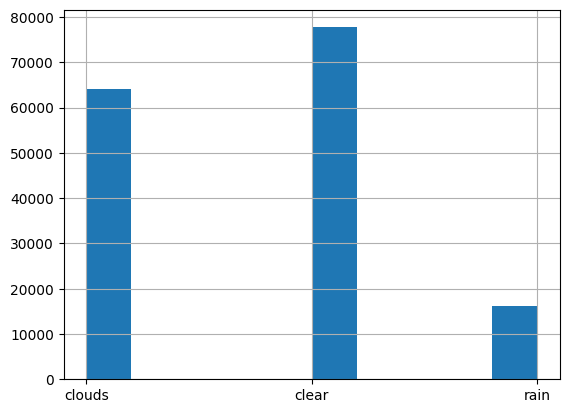

In [ ]:
df_train['weather_main'].hist()

In [ ]:
df_train = df_train.drop(index = (df_train[(df_train['pressure'] == 0) | (df_train['humidity'] == 0)]).index)

In [ ]:
df_train['temp'].max()

315.6

<Axes: >

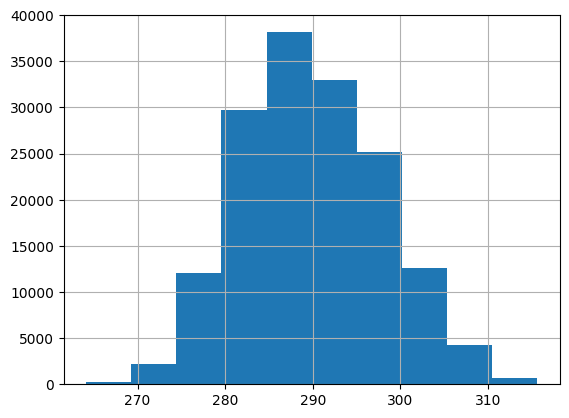

In [ ]:
df_train['temp'].hist()

In [ ]:
df_train.iloc[df_train['temp'].argsort()[(int)(len(df_train)*0.95):].to_list()]['city_name'].value_counts()

,count
city_name,
Seville,3842
Madrid,2384
Valencia,1051
Barcelona,334
Bilbao,293


In [ ]:
df_train[df_train['temp_max'] > df_train['temp'].quantile(0.95)].groupby(['city_name'])['weather_main'].value_counts()

city_name   weather_main
 Barcelona  clouds           847
            clear            663
            rain             110
Bilbao      clear            386
            clouds           312
            rain               8
Madrid      clear           2591
            clouds           656
            rain              35
Seville     clear           5960
            clouds           967
            rain             207
Valencia    clouds           826
            clear            683
            rain               4
Name: count, dtype: int64

In [ ]:
df_train[df_train['snow_3h'] != 0]['temp'].mean()-273.15

2.968751012731502

In [ ]:
(df_train[df_train['snow_3h'] != 0]['temp_max']-df_train[df_train['snow_3h'] != 0]['temp_min']).mean()

0.0

In [ ]:
(df_train[df_train['temp_max'] > df_train['temp'].quantile(0.95)]['temp_max']-df_train[df_train['temp_max'] > df_train['temp'].quantile(0.95)]['temp_min']).mean()

6.592148719747455

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df_train.drop(columns = ['dt_iso', 'city_name', 'weather_description', 'weather_icon', 'weather_id', 'clouds_all'],
              inplace = True)
dict = {'clouds':0, 'clear':1, 'rain':2}
df_train['weather_main'].map(dict)
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns = ['weather_main']),
                                                    df_train['weather_main'],
                                                    test_size = 0.33,
                                                    stratify = df_train['weather_main'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.6988727858293076
0.5335097001763669


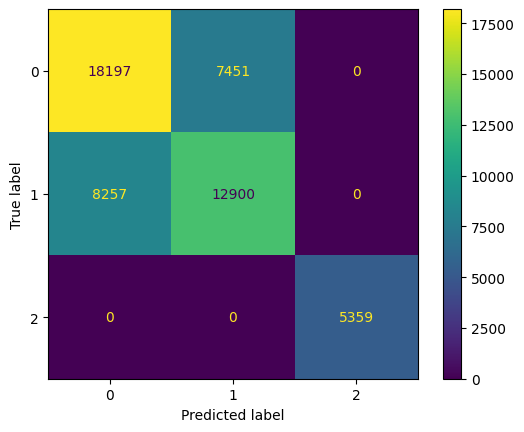

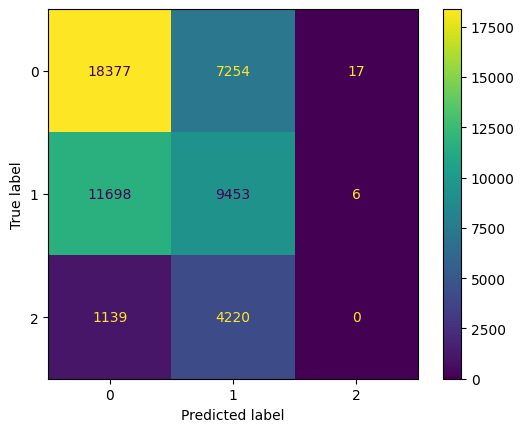

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

dtc = DecisionTreeClassifier(max_depth = 10)
dtc.fit(X_train, y_train)
log_reg = LogisticRegression(solver = 'saga', max_iter = 500)
log_reg.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
pred_log_reg = log_reg.predict(X_test)
print(accuracy_score(y_test, pred_dtc))
print(accuracy_score(y_test, pred_log_reg))
cm_dtc = confusion_matrix(y_test, pred_dtc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dtc)
cm_log_reg = confusion_matrix(y_test, pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg)
disp.plot()
disp_log_reg.plot()

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtc,
                      df_train.drop(columns = ['weather_main']),
                      df_train['weather_main'],
                      cv = 10).mean())
#print(cross_val_score(log_reg,
#                      df_train.drop(columns = ['weather_main']),
#                      df_train['weather_main'],
#                      cv = 10).mean())

0.6991965584867464


In [ ]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer(norm = 'l2')
df_normalized = pd.DataFrame(transformer.fit_transform(df_train.drop(columns = ['weather_main'])),
             columns = df_train.drop(columns = ['weather_main']).columns)
X_train, X_test, y_train, y_test = train_test_split(df_normalized,
                                                    df_train['weather_main'],
                                                    test_size = 0.33,
                                                    stratify = df_train['weather_main'])

In [ ]:
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
print(accuracy_score(y_test, pred_dtc))
log_reg.fit(X_train, y_train)
pred_log_reg = log_reg.predict(X_test)
print(accuracy_score(y_test, pred_log_reg))

0.6907445748025458
0.539797561536692


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
pca = PCA(n_components=5)
union = FeatureUnion([("pca", PCA(n_components=5)),
                      ("normalizer", Normalizer(norm = 'l2'))])
pipe = Pipeline(steps = [('union', union),
                         ('dtc', dtc)])
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns = ['weather_main']),
                                                    df_train['weather_main'],
                                                    test_size = 0.33,
                                                    stratify = df_train['weather_main'])
pipe.fit(X_train, y_train)
print(accuracy_score(y_test, pipe.predict(X_test)))

0.7004447511693889


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'union__pca__n_components':[3,5],
              'dtc__criterion':['gini', 'entropy']}
clf = GridSearchCV(pipe, parameters)
clf.fit(X_train, y_train)
pred_grid = clf.best_estimator_.predict(X_test)
print(accuracy_score(y_test, pred_grid))

0.7023042711448508


In [ ]:
y = pd.read_csv('class.csv')
df_test = pd.read_csv('weather_test.csv')
df_test.drop(columns = ['dt_iso', 'city_name', 'weather_description', 'weather_icon', 'weather_id', 'clouds_all',
                        'Unnamed: 0'],
              inplace = True)
y.drop(columns = ['Unnamed: 0'], inplace = True)
y['weather_main'].map(dict)
enc.fit_transform(y)
df_test['weather_main'] = pipe.predict(df_test)
accuracy_score(y, df_test['weather_main'])

0.7023

In [ ]:
df_test

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,weather_main
0,293.150,293.150,293.150,1019,45,2,200,0.0,0.0,0.0,clear
1,265.442,265.442,265.442,972,64,0,240,0.0,0.0,0.0,clear
2,302.870,301.050,304.150,1012,29,6,290,0.0,0.0,0.0,clouds
3,291.944,291.944,291.944,956,34,3,29,0.0,0.0,0.0,clear
4,312.540,310.650,313.150,1017,11,5,220,0.0,0.0,0.0,clear
...,...,...,...,...,...,...,...,...,...,...,...
9995,290.060,282.150,300.150,1024,81,4,70,0.0,0.0,0.0,clear
9996,276.540,276.150,277.150,1025,86,0,0,0.0,0.0,0.0,clear
9997,289.190,287.590,291.150,1020,63,3,70,0.0,0.0,0.0,clouds
9998,292.110,290.150,295.150,1018,64,1,348,0.0,0.0,0.0,clouds


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
pipe = Pipeline(steps = [('union', union),
                         ('reg', reg)])
df_train['weather_main'] = df_train['weather_main'].map(dict)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print(accuracy_score(y_test, np.round(pred,0)))

0.5114638447971781


In [ ]:
y_train.value_counts()

,count
weather_main,
1,52071
0,42955
2,10880


In [ ]:
pred

array([0.60463207, 0.71837519, 0.72539152, ..., 0.72485573, 1.46263297,
       0.56729768])